### 1. Preparation

Installing required libraries

In [22]:
#%pip install matplotlib
#%pip install pandas
#%pip install seaborn
#%pip install scikit-learn

Importing Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Preprocessing

##### Import Dataset

In [24]:
df = pd.read_csv('customer_churn_data.csv', sep=';')
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


##### Dataset General Info

Checking data types

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   object 
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


Change TotalCharges into float64

In [26]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     829 non-null    float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


Check the number of rows and columns

In [28]:
df.shape #rows, cols

(1000, 10)

Check duplicated values

In [29]:
df.duplicated().sum()

np.int64(0)

Check null values

In [30]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges       171
TechSupport          0
Churn                0
dtype: int64

There are two columns that have Null values:

        a. InternetService (object) => we can impute this by creating new category
        b. TotalCharges (float64) => we can impute this by using median

#### Impute Missing Data

##### a. InternetService

Create new category called "Not Mentioned"

In [31]:
df['InternetService'] = df['InternetService'].fillna('Not Mentioned')

<Axes: xlabel='InternetService', ylabel='count'>

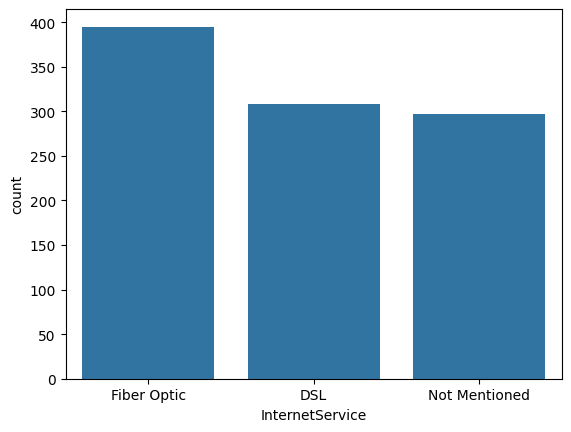

In [32]:
sns.countplot(df, x='InternetService')

**This method is actually a simplified version of SimpleImputer (without using sklearn library), for reference:**

https://www.youtube.com/watch?v=k3KrhjvaCq0

We can impute the "Not Mentioned" values using One Hot Encoder:

https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

or by using "simpleImputer":

https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer/

##### b. TotalCharges

<Axes: xlabel='TotalCharges', ylabel='Count'>

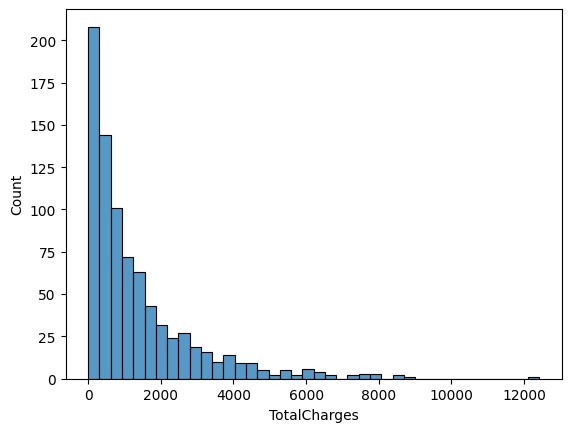

In [36]:
sns.histplot(df, x='TotalCharges')

The distribution is not normal, therefore we need to use median to impute the data

In [48]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [49]:
df['TotalCharges'].isnull().sum()

np.int64(0)

#### Dataset Statistical Info

In [50]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1256.095960
std,288.819436,9.797741,18.89257,25.712083,1453.373048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,377.400000
50%,500.500000,45.000000,13.00000,74.060000,796.320000
75%,750.250000,51.000000,26.00000,96.102500,1509.257500
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


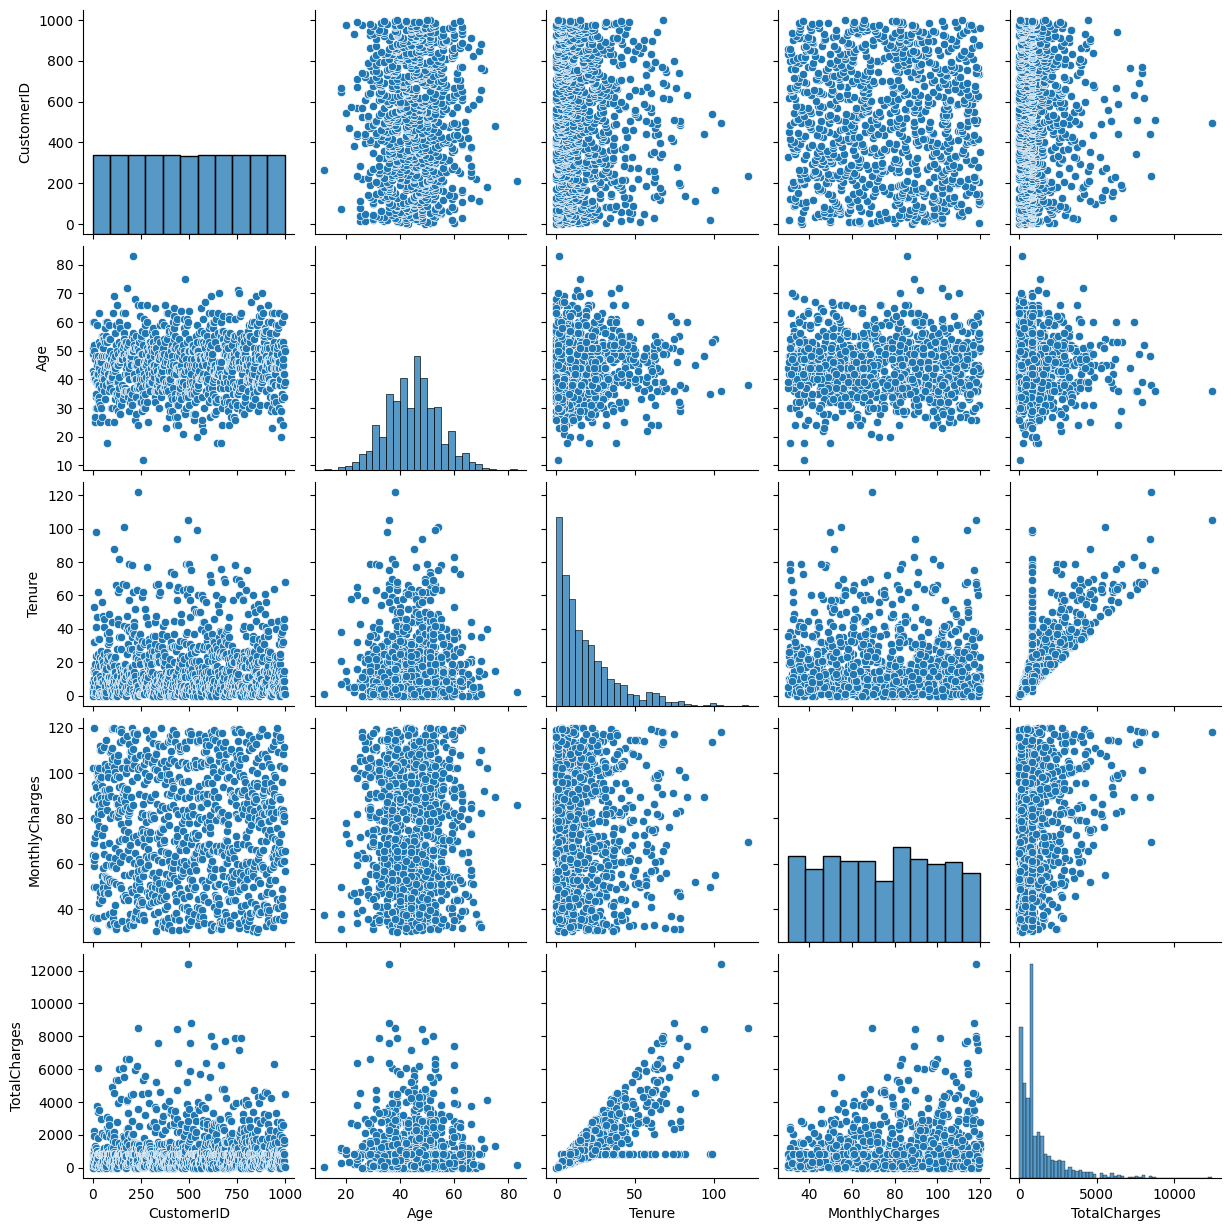

In [53]:
sns.pairplot(df)

Let's take a look at the correlation by using Heatmap:

In [68]:
numeric_columns = df.select_dtypes(np.number)
corr = numeric_columns.corr()
corr

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.000316
Age,0.036730,1.000000,0.000472,0.006362,-0.004304
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.793662
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.280125
TotalCharges,-0.000316,-0.004304,0.793662,0.280125,1.000000


<Axes: >

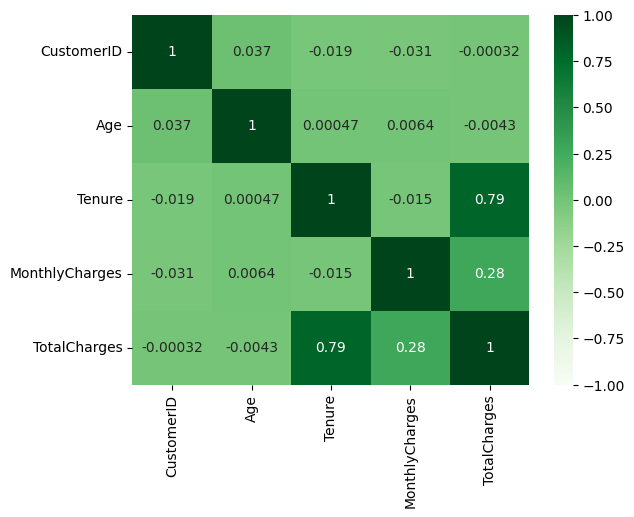

In [71]:
sns.heatmap(corr, annot=True, cmap="Greens", vmin=-1, vmax=1)

Based on the correlation table and heatmap above, we can infer that:

- Tenure have pretty high correlation with TotalCharges, with the value being 79%
- MonthlyCharges have low correlation with TotalCharges, with the value being 28%

So, does that mean that the TotalCharges affect the Tenure of the customers? Let's check it out at the statistical test below.

### 2. Statistical Test

#### 2a. Define Business Question

#### 2b. Define Hypothesis

#### 2c. Hypothesis Testing using T-Test

#### 2d. Hypothesis Interpretation

### 3. Regression Model

#### 3a. Single Predictor (Linear Regression)

#### 3b. Multiple Predictor (Logistic Regression) => Binary Data

### 4. Conclusion and Recommendation